# House Price Prediction
## Boston House Prices

https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town

* CRIM per capita crime rate by town

* ZN proportion of residential land zoned for lots over 25,000 sq.ft.

* INDUS proportion of non-retail business acres per town

* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

* NOX nitric oxides concentration (parts per 10 million)

* RM average number of rooms per dwelling

* AGE proportion of owner-occupied units built prior to 1940

* DIS weighted distances to five Boston employment centres

* RAD index of accessibility to radial highways

* TAX full-value property-tax rate per 10 000 USD

* PTRATIO pupil-teacher ratio by town

* B 1000 (Bk - 0.63)^2 where Bk is the proportion of black people by town

* LSTAT % lower status of the population

* MEDV Median value of owner-occupied homes in $1000's

# Data Preprocessing

In [133]:
# Importing the important libraries for data preprocessing and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import sklearn.datasets
import warnings
warnings.filterwarnings("ignore")

In [134]:
# Importing the Boston house price dataset
df = pd.read_csv("boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [135]:
# Rename the target column 
df.rename(columns={'MEDV':'Price'},inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [136]:
# shape of df
df.shape

(506, 14)

In [137]:
# Size of df
df.size

7084

In [138]:
# Checking Null value
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [139]:
# Checking no of duplicate in each column
df[df.duplicated()].sum()

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
Price      0.0
dtype: float64

In [140]:
# Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [141]:
# Summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [142]:
correlation = df.corr()

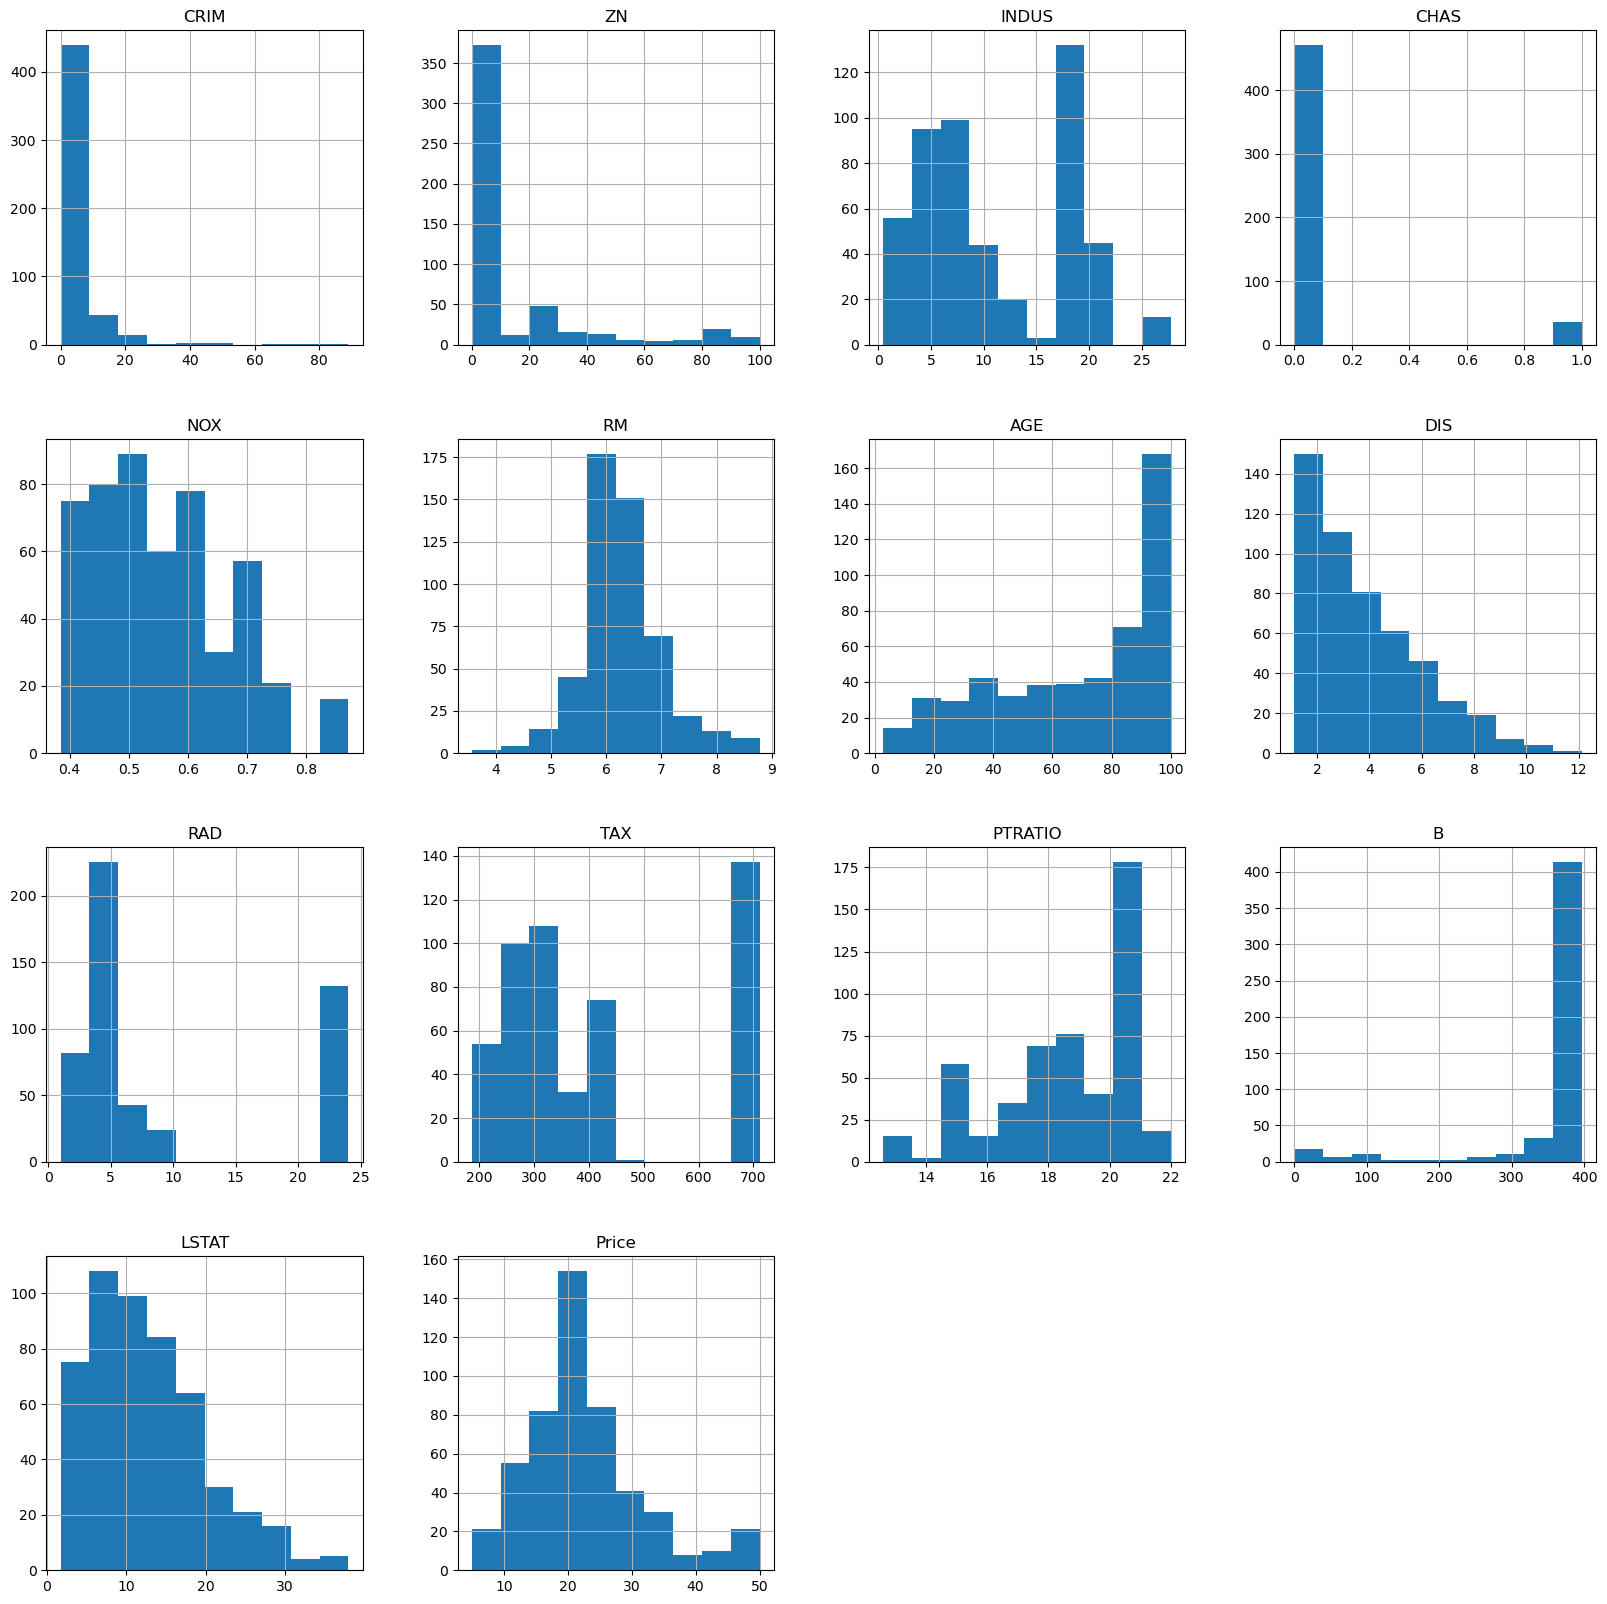

In [143]:
# Understanding ecah numerical column through histogram
p=df.hist(figsize = (20,20))

<Axes: >

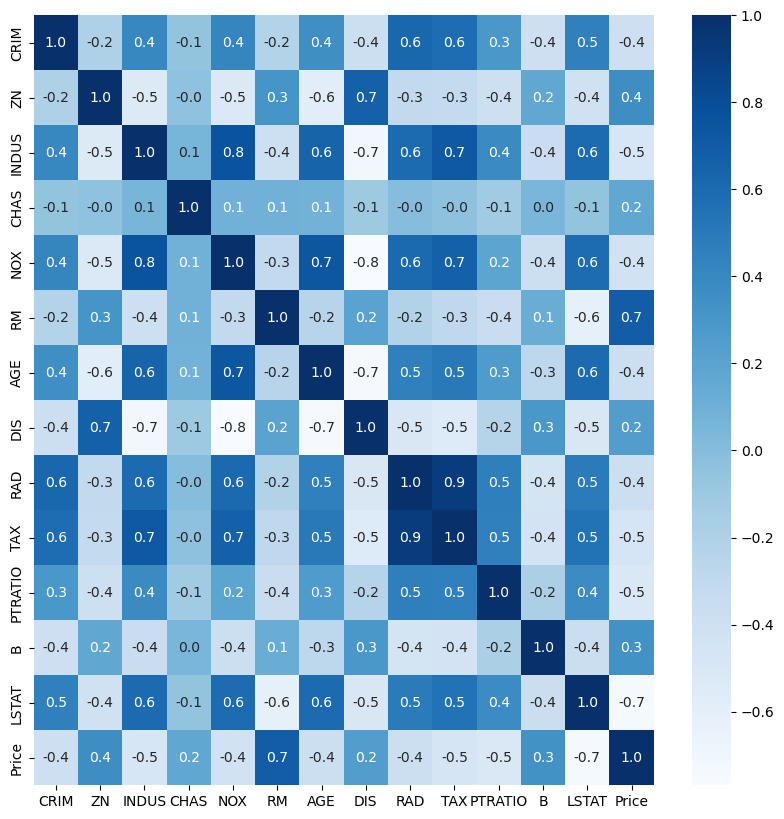

In [144]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='Blues',fmt='.1f')

In [145]:
# Creating the dependent and independent variables from dataset df
X = df.drop(columns='Price',axis=1) # independent variable column
Y = df['Price'] # dependent variable column

In [146]:
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [147]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64


# Train Test Split

In [148]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [150]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


# Model Training

## Linear Regression

In [151]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [152]:
# Initialization of Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

## Predictions on train set

In [153]:
# Making predictions on the train set
Y_train_pred_lr = lr_model.predict(X_train)

In [154]:
print(Y_train_pred_lr)

[10.96952405 19.41196567 23.06419602 12.1470648  18.3738116  25.24677946
 20.77024774 23.90932632  7.81713319 19.60988098 21.8202963  27.59615864
 32.67986504 15.12308446 35.3964561  12.99688651 20.728181   28.30223542
 15.61724836 24.45143096  4.61794591 23.76681932 25.56178249 22.98928526
 24.5213025  34.06407919 19.71166707 39.11233072 14.62515846 24.81139885
 18.02332883 20.85836445  9.57577261 20.87246835 22.28583096 31.79327155
 31.04748307 15.70611763 17.01382935 28.23332703 24.27661276 16.88670215
  6.90720745 26.75808901 22.586493   17.53664716 13.77197016 41.04840929
 16.44690754 18.23531669 25.37038646 23.64581399 22.05322581 20.83620499
 16.93508273 22.797579   29.13333934  7.69310515 24.60571452 17.2358028
 21.10846551 25.15150324 27.33394823 21.30494963 41.5811902  19.19666651
 15.37955448 19.33545877 17.04687638 22.96801532 23.11094953 33.6977586
 22.77436405 20.28968381 25.35517813 31.02479125 33.05103792 28.44712333
  8.50926331  5.61220643 12.81228164 19.81854491 34.8

In [155]:
# Evaluating the model
mse = mean_squared_error(Y_train, Y_train_pred_lr)
rmse = mean_squared_error(Y_train, Y_train_pred_lr, squared=False)  # taking square root to get RMSE
r2 = r2_score(Y_train, Y_train_pred_lr)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 21.641412753226312
Root Mean Squared Error (RMSE): 4.6520331848801675
R-squared (R2): 0.7508856358979673


### Visualizing the actual Prices and predicted prices (Train Set)

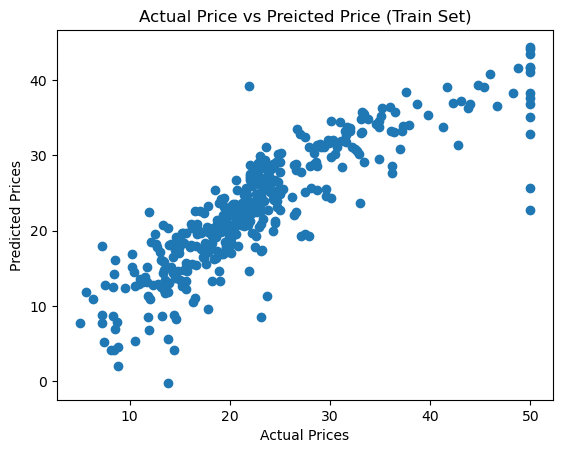

In [156]:
plt.scatter(Y_train, Y_train_pred_lr)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price (Train Set)")
plt.show()

## Predictions on test set

In [157]:
# Making predictions on the test set
Y_test_pred_lr = lr_model.predict(X_test)

In [158]:
print(Y_test_pred_lr)

[28.99672362 36.02556534 14.81694405 25.03197915 18.76987992 23.25442929
 17.66253818 14.34119    23.01320703 20.63245597 24.90850512 18.63883645
 -6.08842184 21.75834668 19.23922576 26.19319733 20.64773313  5.79472718
 40.50033966 17.61289074 27.24909479 30.06625441 11.34179277 24.16077616
 17.86058499 15.83609765 22.78148106 14.57704449 22.43626052 19.19631835
 22.43383455 25.21979081 25.93909562 17.70162434 16.76911711 16.95125411
 31.23340153 20.13246729 23.76579011 24.6322925  13.94204955 32.25576301
 42.67251161 17.32745046 27.27618614 16.99310991 14.07009109 25.90341861
 20.29485982 29.95339638 21.28860173 34.34451856 16.04739105 26.22562412
 39.53939798 22.57950697 18.84531367 32.72531661 25.0673037  12.88628956
 22.68221908 30.48287757 31.52626806 15.90148607 20.22094826 16.71089812
 20.52384893 25.96356264 30.61607978 11.59783023 20.51232627 27.48111878
 11.01962332 15.68096344 23.79316251  6.19929359 21.6039073  41.41377225
 18.76548695  8.87931901 20.83076916 13.25620627 20

In [159]:
# Evaluating the model
mse = mean_squared_error(Y_test, Y_test_pred_lr)
rmse = mean_squared_error(Y_test, Y_test_pred_lr, squared=False)  # taking square root to get RMSE
r2 = r2_score(Y_test, Y_test_pred_lr)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 24.29111947497323
Root Mean Squared Error (RMSE): 4.9286021826653075
R-squared (R2): 0.668759493535636


### Visualizing the actual Prices and predicted prices (Test Set)

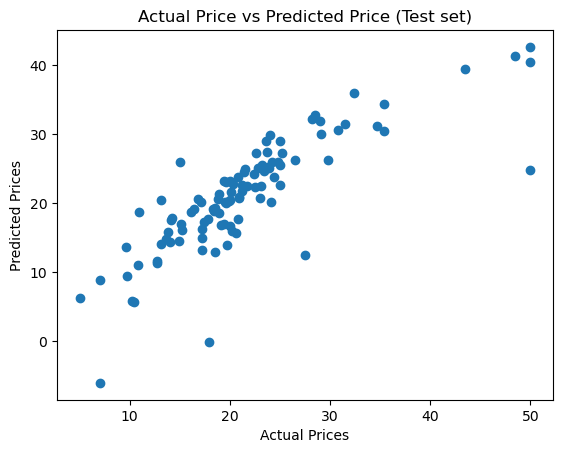

In [160]:
plt.scatter(Y_test, Y_test_pred_lr)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price (Test set)")
plt.show()

# XGBoost Regressor

In [161]:
# Import library for XGBoost Regressor
from xgboost import XGBRegressor

In [162]:
# Initialization of XGBoost Regressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

## Predictions on train set

In [163]:
# Making predictions on the train set
Y_train_pred_xgb = xgb_model.predict(X_train)

In [164]:
print(Y_train_pred_xgb)

[12.006792  19.914322  19.41386   13.41272   18.233686  24.599525
 21.084385  24.691845   8.696693  27.479736  20.694065  36.1663
 31.603483  11.695366  39.791046  13.88976   21.810648  23.713993
 17.597576  24.410297   8.793519  19.173897  25.288088  20.433308
 23.098907  37.891342  15.598552  45.398563  15.698146  22.600924
 14.546442  18.711456  17.798622  16.106794  20.609913  31.608261
 29.09079   15.603799  17.517525  22.501944  19.392653  19.290897
  8.49561   20.603264  16.995317  17.08292   14.509991  49.995197
 14.281856  12.59869   28.704367  21.207237  19.308727  23.09419
 19.099642  25.001644  33.402706   5.00865   29.600845  18.669462
 21.661974  23.051264  22.805435  20.95566   48.781216  14.632303
 16.598646  27.074171  20.081707  19.794664  21.010654  41.29935
 23.153635  20.358414  18.55529   29.412376  36.40918   24.369547
 11.815963  13.803553  12.26066   17.789642  33.0957    26.747456
 13.385397  14.390727  50.0101    21.988642  19.892096  23.77793
 17.521416  12.

In [165]:
# Evaluating the model
mse = mean_squared_error(Y_train, Y_train_pred_xgb)
rmse = mean_squared_error(Y_train, Y_train_pred_xgb, squared=False)  # taking square root to get RMSE
r2 = r2_score(Y_train, Y_train_pred_xgb)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.0004029000393923251
Root Mean Squared Error (RMSE): 0.02007237004920757
R-squared (R2): 0.9999953622164942


### Visualizing the actual Prices and predicted prices (Train Set)

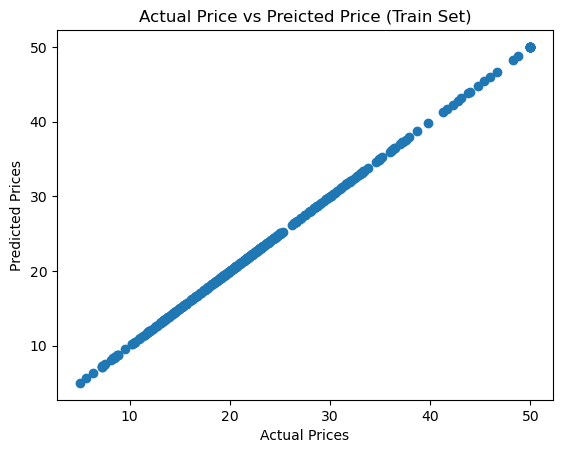

In [166]:
plt.scatter(Y_train, Y_train_pred_xgb)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price (Train Set)")
plt.show()

## Predictions on test set

In [167]:
# Making predictions on the test set
Y_test_pred_xgb = xgb_model.predict(X_test)

In [168]:
print(Y_test_pred_xgb)

[23.25328   30.024755  15.632249  23.313478  17.775118  21.142563
 20.19583   15.010124  21.23614   22.242369  20.457346  19.209145
  8.551788  21.210636  20.696491  26.74365   18.824339  10.525872
 45.68885   14.116162  26.618996  24.94542   13.3510275 20.87231
 15.400073  15.636547  22.324673  12.777009  20.726126  22.56401
 20.346395  22.303246  18.523277  21.764612  15.568828  15.683646
 33.073547  19.115112  21.955132  22.399914  18.998787  31.328337
 43.464993  18.20766   22.09233   14.353467  14.607512  22.716745
 19.700527  27.072327  22.579268  35.133675  16.241447  25.214682
 46.013332  21.89786   15.043295  32.93268   20.53731   16.568089
 24.07178   34.34796   28.542194  16.977676  25.867334  15.649837
 13.039615  23.00082   27.26897   15.414835  21.546648  31.72919
 10.665012  20.770847  21.848396   6.475782  20.939093  46.59454
 12.456056   8.739085  22.215406  13.390212  20.454681  10.45914
 19.722834  27.327946  16.254663  23.860172  25.414312  17.06042
 22.9362     8.1

In [169]:
# Evaluating the model
mse = mean_squared_error(Y_test, Y_test_pred_xgb)
rmse = mean_squared_error(Y_test, Y_test_pred_xgb, squared=False)  # taking square root to get RMSE
r2 = r2_score(Y_test, Y_test_pred_xgb)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 6.560527271813469
Root Mean Squared Error (RMSE): 2.561352625433185
R-squared (R2): 0.9105388132305845


### Visualizing the actual Prices and predicted prices (Test Set)

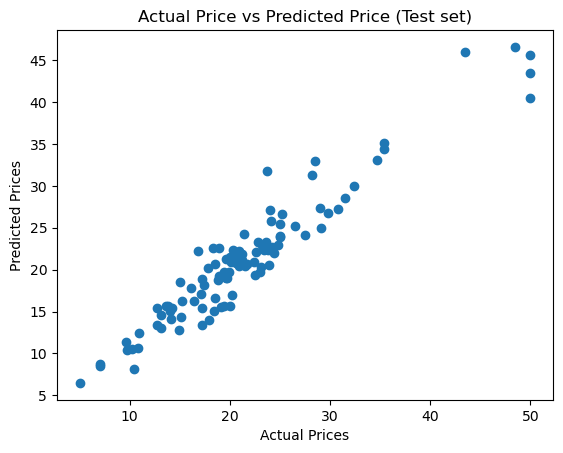

In [170]:
plt.scatter(Y_test, Y_test_pred_xgb)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price (Test set)")
plt.show()